In [1]:
"""
Demo file (do inference on MNIST)
"""


from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
import tensorflow as tf
import numpy as np
np.random.seed(0)

import matplotlib
import matplotlib.pyplot as plt

from keras import backend as K

import os.path
import json

# ============ Parameters ==================
exec_relative_dir = '../../build'
wkdir = '../../data'
num_img = 9

# The folder for saving input
demo_input_dir = os.path.join(wkdir, "demo_input")
demo_input_fname = os.path.join(wkdir, "demo_input", "input.tensor")
os.system("mkdir -p " + demo_input_dir)

Using TensorFlow backend.


0

In [2]:
# helper function for saving np array
def save_np_array(tensor_np, filename):
    result = {}
    result['shape'] = tensor_np.shape
    result['tensor_content'] = []
    
    # iterate throught the tensor
    for i, x in enumerate(np.nditer(tensor_np)):
        result['tensor_content'].append(x.item())
        
    # save to file
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)
        print("Tensor saved to: " + filename)
        
        
def run_cmd(cmd, root_relative_dir):
    import subprocess
    
    # change working directory
    old_dir = os.getcwd()
    os.chdir(root_relative_dir)
    
    p = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True)
    (output, err) = p.communicate()
    p_status = p.wait()
#     print("Command output : ", output)
#     print("Command exit status/return code : ", p_status)
    
    # warp back 
    os.chdir(old_dir)
    
    return output

In [3]:
# select inputs
mnist = tf.keras.datasets.mnist


(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# get input for inference
input_idx = np.random.randint(x_test.shape[0], size=num_img)
input_imgs = x_test[input_idx, :, :]
save_np_array(input_imgs, os.path.join(demo_input_dir, "input.tensor"))

Tensor saved to: ../../data/demo_input/input.tensor


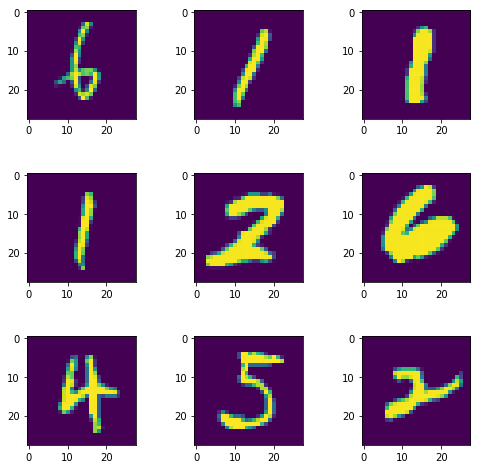

In [4]:
# visualize the input
fig=plt.figure(figsize=(8, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5 )
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(3, 3, i*3+j+1)
        plt.imshow(input_imgs[i*3+j, :, :])
plt.show()


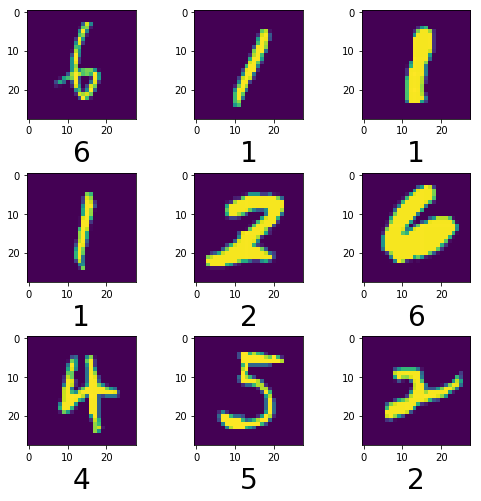

In [5]:
# do the prediction 
cmd = "./predict ../data/model.pb ../data/tensor_weights ../data/demo_input/input.tensor"
output = run_cmd(cmd, exec_relative_dir)

labels = output.split()
# visualize the output
fig=plt.figure(figsize=(8, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5 )
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(3, 3, i*3+j+1)
        plt.imshow(input_imgs[i*3+j, :, :])
        ax.set_xlabel(int(labels[i*3+j]))
        ax.xaxis.label.set_fontsize(28)
plt.show()